In [ ]:
import os

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving bank_marketing.csv to bank_marketing.csv


In [ ]:
import pandas as pd

import numpy as np 

In [ ]:
bank_data = pd.read_csv('bank_marketing.csv')

In [ ]:
bank_data.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,0,41,services,married,unknown,no,88,yes,no,cellular,11,may,105,1,336,2,failure,no
1,1,56,technician,married,secondary,no,1938,no,yes,cellular,26,feb,229,1,192,4,success,yes
2,2,30,services,single,secondary,no,245,no,yes,cellular,8,jul,187,2,-1,0,unknown,no
3,3,34,management,single,tertiary,no,1396,yes,no,cellular,17,jul,630,1,-1,0,unknown,no
4,4,29,technician,single,secondary,no,-13,yes,no,cellular,14,may,512,3,-1,0,unknown,no


In [ ]:
# there is additional column for index numbers that can be removed

bank_data = pd.read_csv('bank_marketing.csv', index_col = 0)

In [ ]:
# getting the number of observations across each of the rows and columns in dataframe

bank_data.shape

(5581, 17)

In [ ]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5581 entries, 0 to 5580
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        5581 non-null   int64 
 1   job        5581 non-null   object
 2   marital    5581 non-null   object
 3   education  5581 non-null   object
 4   default    5581 non-null   object
 5   balance    5581 non-null   int64 
 6   housing    5581 non-null   object
 7   loan       5581 non-null   object
 8   contact    5581 non-null   object
 9   day        5581 non-null   int64 
 10  month      5581 non-null   object
 11  duration   5581 non-null   int64 
 12  campaign   5581 non-null   int64 
 13  pdays      5581 non-null   int64 
 14  previous   5581 non-null   int64 
 15  poutcome   5581 non-null   object
 16  deposit    5581 non-null   object
dtypes: int64(7), object(10)
memory usage: 784.8+ KB


Data types of each of the columns in the given dataframe:

'int64' - 'age', 'balance', 'day', 'duration', campaign', 'pdays', 'previous'

Rest of the 10 columns in the dataframe are of 'object' data type.

---

Numeric and Categorical Features in the given dataframe:

---

The numeric and categorical features are already identified in the assignment question document.

In [ ]:
# checking the null values in the dataframe

bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

There are no null values across each of the columns in the dataset

In [ ]:
print(bank_data['age'].value_counts())

31    251
33    242
34    240
32    234
35    224
     ... 
92      2
18      2
93      2
88      1
89      1
Name: age, Length: 73, dtype: int64


In [ ]:
bank_data['job'].value_counts()

management       1318
blue-collar       975
technician        887
admin.            661
services          452
retired           397
self-employed     206
student           182
unemployed        170
entrepreneur      160
housemaid         143
unknown            30
Name: job, dtype: int64

In [ ]:
bank_data['marital'].value_counts()

married     3134
single      1816
divorced     631
Name: marital, dtype: int64

In [ ]:
bank_data['education'].value_counts()

secondary    2719
tertiary     1871
primary       746
unknown       245
Name: education, dtype: int64

In [ ]:
bank_data['poutcome'].value_counts()

unknown    4133
failure     632
success     539
other       277
Name: poutcome, dtype: int64

The target variable is of categorical data type and is titled 'deposit' in the given dataset. In this assignment, we are required to build a classification model to predict whether the client will subscribe to a term deposit. Hence, we will first check the relations between the target variable and other features in the dataset and visualize those relations.

In [ ]:
# checking the counts of values of clients who subscribed to a term deposit and those who did not subscribe to a term deposit

bank_data['deposit'].value_counts()

no     2959
yes    2622
Name: deposit, dtype: int64

The output of above code shows that the given dataset is not an imbalanced dataset as there is a considerable proportion of both the 'yes' and 'no' values in the target variable, 'deposit'. 'yes' values are 47% and 'no' values are 53%. Thus, we can build a classification model without requiring treatment of values as we don't have an imbalanced dataset. 

In [ ]:
# checking the counts of values of number of times the clients were contacted in the previous campaign

bank_data['previous'].value_counts()

0     4133
1      452
2      351
3      228
4      130
5       80
6       59
7       42
8       30
9       16
10      13
11       8
12       7
17       6
13       6
15       3
14       2
20       2
19       2
40       1
16       1
28       1
27       1
29       1
23       1
41       1
22       1
26       1
30       1
37       1
Name: previous, dtype: int64

In [ ]:
bank_data['contact'].value_counts()

cellular     4044
unknown      1155
telephone     382
Name: contact, dtype: int64

In [ ]:
# number of counts of values of contacts done during the second campaign
bank_data['campaign'].value_counts()

1     2367
2     1526
3      687
4      379
5      206
6      131
7       66
8       62
9       39
10      20
11      19
13      13
12      11
14       9
15       8
17       6
21       5
16       3
18       3
24       3
22       2
32       2
19       2
20       1
28       1
23       1
33       1
31       1
25       1
41       1
43       1
26       1
30       1
27       1
63       1
Name: campaign, dtype: int64

In [ ]:
# checking the proportion of bank clients who made or not made a deposit by their jobs

pd.crosstab(index = bank_data['job'], columns = bank_data['deposit'], normalize = True, margins = True)

deposit,no,yes,All
job,,,
admin.,0.063609,0.054829,0.118438
blue-collar,0.112704,0.061996,0.174700
entrepreneur,0.018814,0.009855,0.028669
housemaid,0.014872,0.010751,0.025623
management,0.116287,0.119871,0.236158
retired,0.025443,0.045691,0.071134
self-employed,0.018455,0.018455,0.036911
services,0.047124,0.033865,0.080989
student,0.009497,0.023114,0.032611


Interpretation: 

People in management jobs were the highest among the clients doing toher kinds of jobs mentioned in the dataset. Moreover, clients who are management professionals were the highest in percentage among clients who subscribed and those did not subscribe to the term deposit. Moreover, clients whose jobs are not known or 'unknown' are claimed to be the lowest in proportion among all the clients who subscribed and clients who did not subscribe to a term deposit. Overall, there is not much difference either in numbers or proportion among the clients who subscribed to a term deposit and clients who did not subscribe to a term deposit. 

In [ ]:
# checking the proportion of bank clients who made or not made a term deposit by their education level

pd.crosstab(index = bank_data['education'], columns = bank_data['deposit'], normalize = True, margins = True)

deposit,no,yes,All
education,,,
primary,0.079556,0.054112,0.133668
secondary,0.275040,0.212148,0.487189
tertiary,0.152661,0.182584,0.335245
unknown,0.022935,0.020964,0.043899
All,0.530192,0.469808,1.000000


Interpretation:

The dataset contains highest proportion for clients having the secondary education followed by clients who had tertiary education. Clients who have attained secondary education both subscribed and not subscribed to the term deposit in highest proportion among the clients who are subscribers and non-subscribers respectively. 

In [ ]:
# checking the proportion of bank clients who made or not made a deposit by their marital status

pd.crosstab(index = bank_data['marital'], columns = bank_data['deposit'], normalize = True, margins = True)

deposit,no,yes,All
marital,,,
divorced,0.061817,0.051245,0.113062
married,0.323777,0.237771,0.561548
single,0.144598,0.180792,0.325390
All,0.530192,0.469808,1.000000


Clients who are married comprised on the highest proportion of people in the dataset. Moreover, highest proportion of married clients subscribed and not subscribed to the term deposit among each of subscribers and non-subscribers. 

In [ ]:
# checking the proportion of bank clients who made or not made a deposit by their default credit

pd.crosstab(index = bank_data['default'], columns = bank_data['deposit'], normalize = True, margins = True)

deposit,no,yes,All
default,,,
no,0.518724,0.466225,0.984949
yes,0.011467,0.003584,0.015051
All,0.530192,0.469808,1.000000


Clients who had higher proportion of default credit among subscribers and non-subscribers of term deposit did not subscribe to the term deposit. 

Clients  have higher proportion of no default credit among non-subscribers of term deposit. 



In [ ]:
# checking the proportion of bank clients who made or not made a deposit by their housing loan 

pd.crosstab(index = bank_data['housing'], columns = bank_data['deposit'], normalize = True, margins = True)

deposit,no,yes,All
housing,,,
no,0.230425,0.294213,0.524637
yes,0.299767,0.175596,0.475363
All,0.530192,0.469808,1.000000


Interpretation:

The output of above code shows that more clients subscribe to term deposit when do not have a housing loan and more clients do not subscribe to term deposit when they have a housing loan 

In [ ]:
# checking the proportion of bank clients who made or not made term deposits by their personal loan 

pd.crosstab(index = bank_data['loan'], columns = bank_data['deposit'], normalize = True, margins = True)

deposit,no,yes,All
loan,,,
no,0.446515,0.424834,0.871349
yes,0.083677,0.044974,0.128651
All,0.530192,0.469808,1.000000


Interpretation:

The output of above code shows that more clients subscribe to term deposit when do not have a personal loan and there is not much difference between the proportions of clients who subscribe and do not subscribe to term deposit when they do not have personal loan. 

In [ ]:
# counts of values in 'pdays' column of dataframe
bank_data['pdays'].value_counts()

-1      4133
 92       49
 182      46
 91       45
 183      40
        ... 
 6         1
 603       1
 749       1
 701       1
 24        1
Name: pdays, Length: 379, dtype: int64

Observation:

The value of -1 in 'pdays' column refers to days passed for those clients who were not contacted in the previous marketing campaign. Hence, the corresponding values in 'poutcome' column for such clients could be labeled as 'unknown'. It is already observed in the counts of values in 'poutcome' column that there are exactly the same 4133 values in this column. Moreover, 'previous' column can also give us similar information in cases of no contacts. There are 4133 values that correspond to number of times clients were contacted in the previous campaign. 

It is required to be checked whether these specific values in the columns, 'pdays', 'poutcome', and 'previous' are of any significance to the prediction of target variable, 'deposit'. 



In [ ]:
# extracting the rows corresponding to poutcome = 'unknown' to check the relations with the target variable, 'deposit'

bank_data.loc[bank_data['poutcome'] == 'unknown', :]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2,30,services,single,secondary,no,245,no,yes,cellular,8,jul,187,2,-1,0,unknown,no
3,34,management,single,tertiary,no,1396,yes,no,cellular,17,jul,630,1,-1,0,unknown,no
4,29,technician,single,secondary,no,-13,yes,no,cellular,14,may,512,3,-1,0,unknown,no
5,26,unemployed,single,secondary,no,632,no,no,cellular,12,feb,218,1,-1,0,unknown,yes
7,46,management,married,tertiary,no,3,no,no,cellular,18,aug,92,4,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5573,45,technician,single,secondary,no,410,yes,no,unknown,30,may,891,4,-1,0,unknown,yes
5574,47,services,married,secondary,no,405,no,yes,cellular,8,aug,994,2,-1,0,unknown,yes
5575,31,technician,married,secondary,no,589,yes,yes,unknown,21,may,151,1,-1,0,unknown,no
5576,48,admin.,married,secondary,no,2235,yes,yes,unknown,15,may,755,2,-1,0,unknown,no


In [ ]:
bank_data.loc[bank_data['poutcome'] == 'unknown', 'previous'].value_counts()

0    4133
Name: previous, dtype: int64

The output of above code gives a confirmation that the bank did not contact the clients for the previous campaign corresponding to all the values where 'poutcome' was labeled as 'unknown'. 

In [ ]:
# checking the counts of values of 'deposit' for the rows extracted in the code above

bank_data.loc[bank_data['poutcome'] == 'unknown', 'deposit'].value_counts()

no     2457
yes    1676
Name: deposit, dtype: int64

Since the output of above code suggests that there are considerable number of clients that were not contacted in previous campaign, but they have subscribed to the term deposit in the second campaign. Hence, these rows do have some relation with the target variable, 'deposit' and that's why these rows cannot be dropped. 

There is another column, 'contact' that gives information about the type of contact device used for communication. However, we have observed earlier that some of the values in 'contact' are labeled as 'unknown'. The next step will be to check the patterns in the dataset for rows in which values in 'contact' are labeled 'unknown'.


In [ ]:
# extracting the rows in which values in 'contact' are labeled as 'unknown' in the dataframe

bank_data.loc[bank_data['contact'] == 'unknown', :]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
14,38,blue-collar,divorced,secondary,no,2998,yes,no,unknown,11,jun,91,1,-1,0,unknown,no
19,35,blue-collar,married,primary,no,994,yes,no,unknown,23,may,1349,8,-1,0,unknown,yes
21,38,blue-collar,married,primary,no,668,no,no,unknown,8,may,238,1,-1,0,unknown,no
31,28,management,married,secondary,no,292,yes,no,unknown,28,may,507,1,-1,0,unknown,yes
33,38,services,married,primary,no,175,no,no,unknown,17,jun,132,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5571,37,services,single,secondary,no,278,yes,no,unknown,3,jun,1045,3,-1,0,unknown,yes
5572,45,unknown,married,primary,no,44,no,no,unknown,11,jun,81,1,-1,0,unknown,no
5573,45,technician,single,secondary,no,410,yes,no,unknown,30,may,891,4,-1,0,unknown,yes
5575,31,technician,married,secondary,no,589,yes,yes,unknown,21,may,151,1,-1,0,unknown,no


In [ ]:
# it is observed in the output of above code that the rows in which the values of 'contact' is labeled 'unknown', the corresponding values of
# 'poutcome', 'previous', 'pdays' show that these particular clients were not contacted in the previous campaign but in the second campaign
# and these clients have no credit in default as suggested by the values in 'default' column. However, we have to verify whether our interpretation is 
# correct by checking for values across the selected columns

bank_data.loc[bank_data['contact'] == 'unknown', ['default', 'poutcome', 'previous', 'pdays', 'deposit']].value_counts()

default  poutcome  previous  pdays  deposit
no       unknown   0         -1     no         852
                                    yes        261
yes      unknown   0         -1     no          26
                                    yes          5
no       success   2          404   no           1
                              147   yes          1
                   1          651   no           1
                              417   yes          1
                              378   yes          1
         other     41         778   no           1
                   6          701   no           1
                   1          782   yes          1
         failure   3          170   yes          1
                   2          384   yes          1
                   1          394   yes          1
dtype: int64

Observation:

When 'poutcome' = 'unknown', the value of 'unknown' only suggests that the client was not contacted in the previous campaign. But, the values labeled 'unknown' in 'contact' column just suggests that either the person who collected the data committed some errors in the collection procedures or it might be possible that bank officials, who monitored the effectiveness of campaign failed to record the type of communication device used to contact the clients as some of the values in 'previous' column are greater than 0 corresponding to the values labeled 'unknown' in 'contact' column. Thus, these particular clients were contacted during the previous campaign but the information about type of communication device used for making contacts is not available. 

We can also check the median duration in seconds for the unique values in 'contact' column to further identify patterns

In [ ]:
# checking the type of device used for communication during the campaigns and the median duration for which they were contacted  
# by the banks and the relation to subscription to a term deposit

pd.pivot_table(bank_data, index = 'contact', columns = 'deposit', values = 'duration', aggfunc = 'median', margins = True)

deposit,no,yes,All
contact,,,
cellular,160.5,392.0,262.0
telephone,148.0,379.0,252.5
unknown,167.0,775.0,227.0
All,161.0,419.5,254.0


In [ ]:
pd.crosstab(index = bank_data['contact'], columns = bank_data['deposit'], normalize = True, margins = True)

deposit,no,yes,All
contact,,,
cellular,0.337932,0.386669,0.724601
telephone,0.034223,0.034223,0.068447
unknown,0.158036,0.048916,0.206952
All,0.530192,0.469808,1.000000


Interpretation:

The output of above two code expressions show that whenever the communication made by the bank to the clients lasted for more duration, the client subscribed to the term deposit. Moreover, we had observed earlier that number of clients contacted by banks during the campaigns by using cellular communication were the highest. Moreover, more clients contacted by the banks using 'cellular' communication type subscribed to term deposits and more clients contacted by the banks using 'unknown' communication type did not subscribe to term deposits. The proportion of subscribers and non-subscribers of term deposits is same in case of clients contacted by banks using 'cellular' communication type.

In [ ]:
bank_data.loc[bank_data['duration'] < 60, 'deposit'].value_counts()

no     332
yes      7
Name: deposit, dtype: int64

In [ ]:
# checking the patterns for the rows in values of 'poutcome' are labeled as 'other' in the dataframe

bank_data.loc[bank_data['poutcome'] == 'other', :]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
12,56,retired,divorced,primary,no,694,no,no,cellular,29,jan,144,1,102,1,other,yes
42,32,management,single,tertiary,no,131,yes,no,cellular,11,aug,112,1,81,1,other,no
112,44,management,married,tertiary,no,445,no,yes,telephone,6,feb,135,2,9,7,other,no
137,26,technician,single,secondary,no,1105,yes,no,cellular,6,sep,415,1,297,3,other,yes
149,56,blue-collar,married,secondary,no,1521,yes,yes,cellular,21,nov,19,2,179,3,other,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5532,29,blue-collar,single,secondary,no,2806,no,no,cellular,15,oct,294,1,93,5,other,no
5551,37,technician,married,secondary,no,0,yes,no,cellular,16,apr,657,4,149,1,other,no
5558,32,admin.,single,secondary,no,-32,no,no,cellular,29,jan,320,1,185,5,other,no
5578,27,student,single,secondary,no,91,no,no,telephone,4,dec,157,6,95,37,other,no


After observing the output of above code expression, it is clear that the rows in which values of 'poutcome' or outcome of the previous campaign are labeled as 'other' could not signify the same meaning as the values labeled as 'unknown' in the 'poutcome' column.  This is because the values in 'previous' column are greater than 0 in output of above code expression that suggests these clients were contacted in the previous campaign. Thus, values labeled as 'other' in 'poutcome' column could signify either that there were some errors in collection of data or that bank officials monitoring the effectiveness of campaign failed to record the details of outcomes of previous campaign for clients. For these clients, the values recorded in 'poutcome' column are labeled as 'other'. 

In [ ]:
# checking the counts of subscribers and non-subscribers corresponding to rows in which 'poutcome' is labeled as 'other'

bank_data.loc[bank_data['poutcome'] == 'other', 'deposit'].value_counts()

yes    152
no     125
Name: deposit, dtype: int64

In [ ]:
# checking the statistical summary of dataset

bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,5581.000000,5581.000000,5581.000000,5581.000000,5581.000000,5581.000000,5581.000000
mean,41.169683,1514.736786,15.693603,368.175954,2.507436,52.534313,0.849669
std,11.926044,3266.534626,8.461086,344.131053,2.770717,110.754995,2.311684
min,18.000000,-3058.000000,1.000000,3.000000,1.000000,-1.000000,0.000000
25%,32.000000,110.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,39.000000,542.000000,15.000000,254.000000,2.000000,-1.000000,0.000000
75%,49.000000,1747.000000,22.000000,485.000000,3.000000,57.000000,1.000000
max,93.000000,81204.000000,31.000000,3284.000000,63.000000,842.000000,41.000000


In [ ]:
# checking the relations between the independent variables in the dataframe

bank_datcorr = bank_data.corr()

bank_datcorr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.128465,0.009250,-0.008453,-0.018844,-0.002383,0.022026
balance,0.128465,1.000000,0.005989,0.022242,-0.015866,0.030656,0.044003
day,0.009250,0.005989,1.000000,-0.013211,0.133264,-0.073403,-0.048452
duration,-0.008453,0.022242,-0.013211,1.000000,-0.048190,-0.034635,-0.031562
campaign,-0.018844,-0.015866,0.133264,-0.048190,1.000000,-0.098066,-0.041082
pdays,-0.002383,0.030656,-0.073403,-0.034635,-0.098066,1.000000,0.492715
previous,0.022026,0.044003,-0.048452,-0.031562,-0.041082,0.492715,1.000000


Interpretation:

The output of above code shows that none of the independent numeric variables in the dataset have a strong correlation with other numeric independent variables as all the values are less than +0.8 / -0.8.  

In [ ]:
# checking whether there are any duplicate rows in the dataset and then removing them 

bank_data.duplicated().value_counts()

False    5581
dtype: int64

The output of above code shows that there are no duplicate rows in the dataset as the total 'False' values are 5581, which is total number of rows in the dataframe. 

In [ ]:
# importing the packages for visualisation

import matplotlib.pyplot as plt

import seaborn as sns

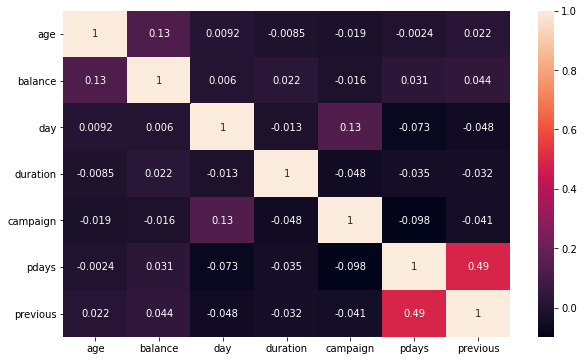

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data=bank_datcorr, annot=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


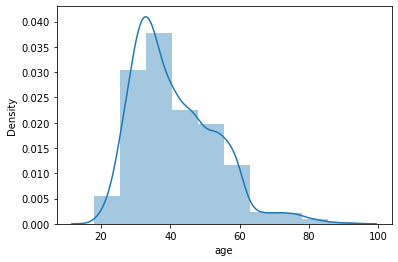

In [ ]:
sns.distplot(bank_data['age'], bins=10)
plt.show()

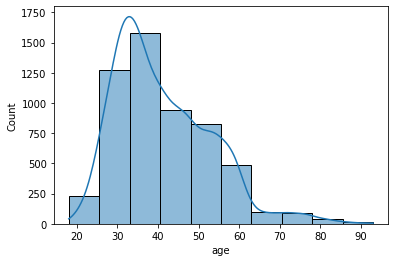

In [ ]:
# Histogram of age

sns.histplot(bank_data['age'], bins=10, kde=True)
plt.show()

The above plot shows that the data in 'age' column is right-skewed. Thus, the data in this column does not follow Gaussian distribution. 

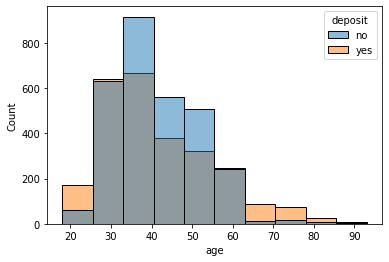

In [ ]:
sns.histplot(x='age', data= bank_data, hue='deposit', bins=10, kde=False)
plt.show()

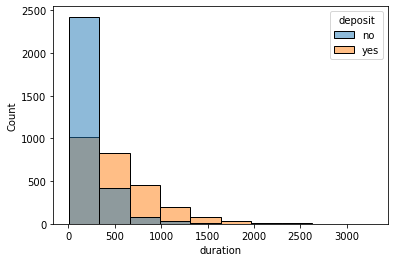

In [ ]:
sns.histplot(x='duration', data=bank_data, hue='deposit', bins=10, kde=False)
plt.show()

The above plot shows that the data in 'duration' column is right-skewed. Thus, the data in this column does not follow Gaussian distribution. 

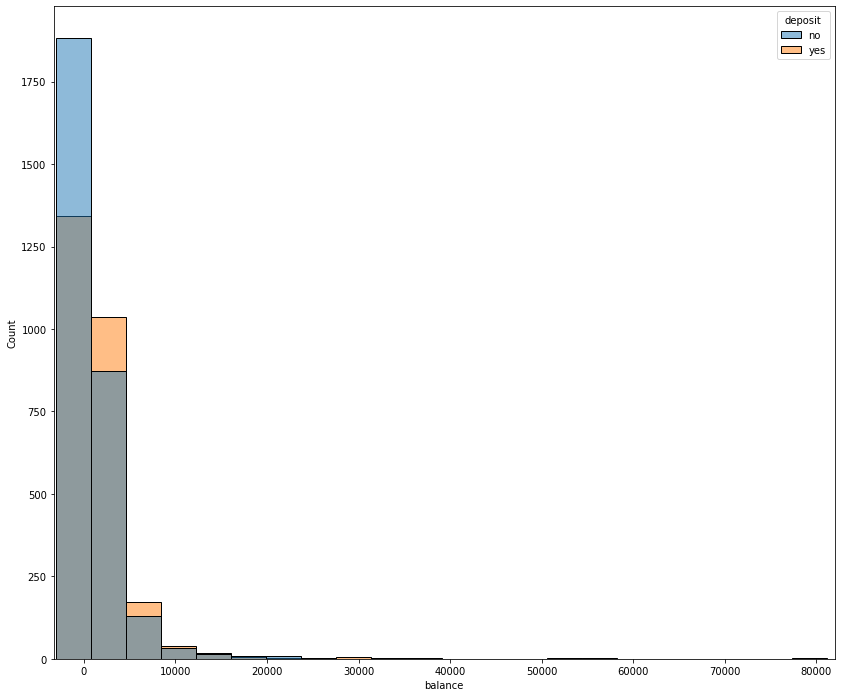

In [ ]:
plt.figure(figsize=(14, 12))
sns.histplot(x='balance', data=bank_data, hue='deposit', bins = 22, kde=False)
plt.xlim(-3300.0, 82000.0)
plt.show()

In [ ]:
pd.crosstab(index = bank_data['job'], columns = bank_data['deposit'], values = bank_data['balance'], aggfunc = 'median')

deposit,no,yes
job,,
admin.,386.0,623.5
blue-collar,418.0,566.5
entrepreneur,318.0,437.0
housemaid,387.0,1041.5
management,398.0,924.0
retired,515.0,1468.0
self-employed,318.0,805.0
services,367.0,462.0
student,703.0,480.0


'day' column can be considered an ordinal variable as there are a ordered sequence of values that correspond to particular day on which the client was contact last by the bank for the campaign. 

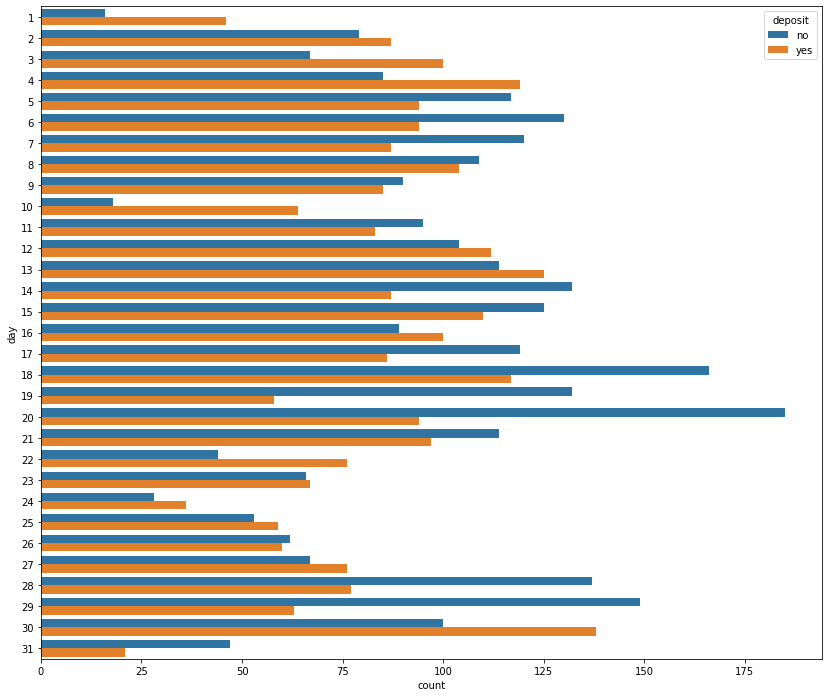

In [ ]:

plt.figure(figsize=(14, 12))
sns.countplot(y='day', hue='deposit', data = bank_data)
plt.show()

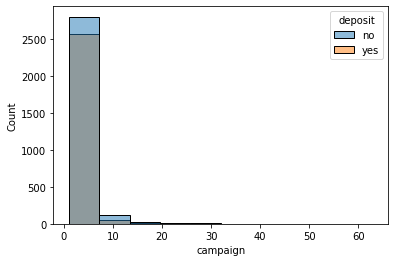

In [ ]:
sns.histplot(x='campaign', data= bank_data, hue='deposit', bins = 10, kde=False)
plt.show()

In [ ]:
# relation between number of times the clients were contacted in this campaign and the number of subscribing and non-subscribing clients

pd.crosstab(index = bank_data['campaign'], columns = bank_data['deposit'], values = bank_data['campaign'], aggfunc = 'count')

deposit,no,yes
campaign,,
1,1105.0,1262.0
2,816.0,710.0
3,376.0,311.0
4,234.0,145.0
5,140.0,66.0
6,80.0,51.0
7,47.0,19.0
8,45.0,17.0
9,30.0,9.0


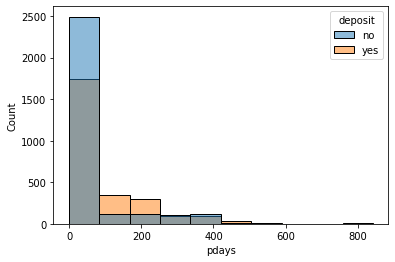

In [ ]:
sns.histplot(x='pdays', data= bank_data, hue='deposit', bins = 10, kde=False)
plt.show()

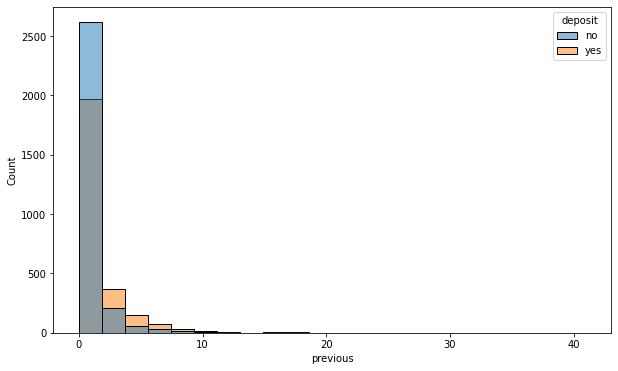

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x= 'previous', data= bank_data, hue= 'deposit', bins = 22, kde=False)
plt.show()

In [ ]:
# relation between number of times the clients were contacted in previous campaign and the number of subscribing and non-subscribing clients

pd.crosstab(index = bank_data['previous'], columns = bank_data['deposit'], values = bank_data['previous'], aggfunc = 'count', margins = True)

deposit,no,yes,All
previous,,,
0,2457.0,1676.0,4133
1,160.0,292.0,452
2,122.0,229.0,351
3,88.0,140.0,228
4,37.0,93.0,130
5,24.0,56.0,80
6,15.0,44.0,59
7,14.0,28.0,42
8,10.0,20.0,30


Observation:

It is an important point to observe that most of the subscribers i.e., almost 64% of subscribers after this campaign were not at all contacted in the previous campaign. This is in contradiction to the most likely goal of the author of the dataset. Based on the variables given in this dataset, it can be figured out that the author or collector of this dataset has strived to establish some connection between the previous and this campaign for comparison of effectiveness of the two campaigns. It is possible that the bank carried out this campaign based on patterns found in other attributes among subscribers and non-subscribers in previous campaign such as housing loan, personal loan, and others. 

In [ ]:
# relation between number of times the clients were contacted in previous campaign and the outcome of that campaign for those clients

pd.crosstab(index = bank_data['previous'], columns = bank_data['poutcome'], values = bank_data['previous'], aggfunc = 'count', margins = True)

poutcome,failure,other,success,unknown,All
previous,,,,,
0,NaN,NaN,NaN,4133.0,4133
1,212.0,79.0,161.0,NaN,452
2,164.0,54.0,133.0,NaN,351
3,100.0,35.0,93.0,NaN,228
4,47.0,27.0,56.0,NaN,130
5,31.0,21.0,28.0,NaN,80
6,22.0,12.0,25.0,NaN,59
7,15.0,13.0,14.0,NaN,42
8,12.0,10.0,8.0,NaN,30


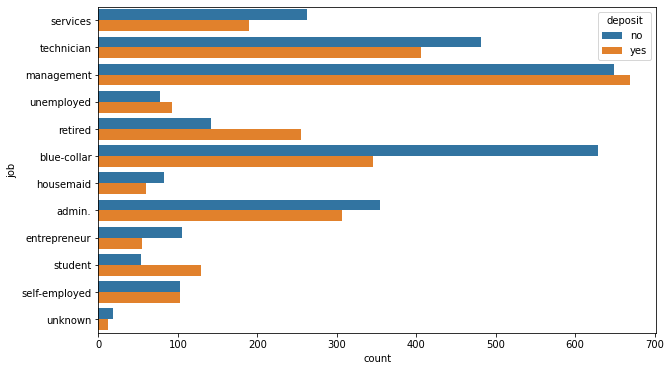

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='job', hue='deposit', data= bank_data)
plt.show()

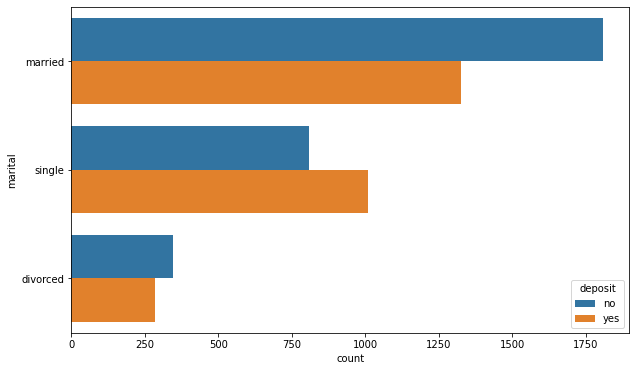

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='marital', hue='deposit', data= bank_data)
plt.show()

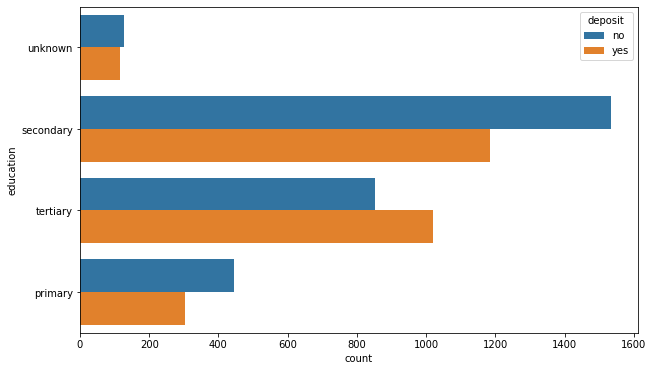

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='education', hue='deposit', data= bank_data)
plt.show()

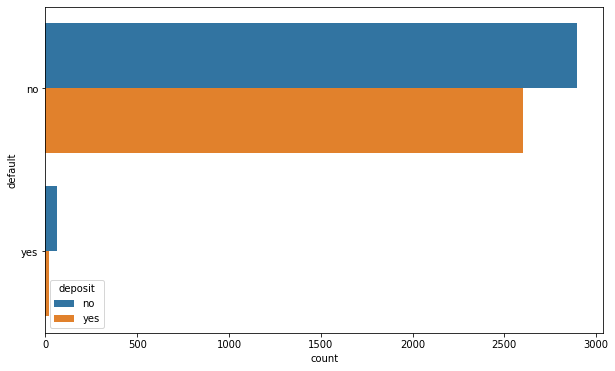

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='default', hue='deposit', data= bank_data)
plt.show()

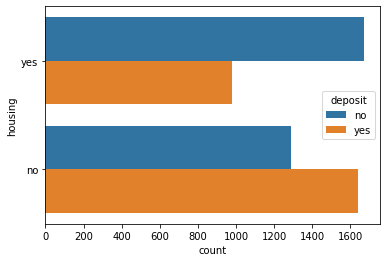

In [ ]:
sns.countplot(y='housing', hue='deposit', data= bank_data)
plt.show()

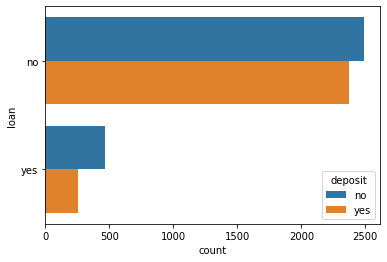

In [ ]:
sns.countplot(y='loan', hue='deposit', data= bank_data)
plt.show()

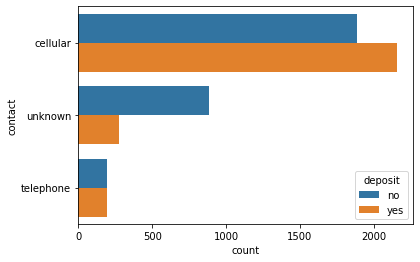

In [ ]:
sns.countplot(y='contact', hue='deposit', data= bank_data)
plt.show()

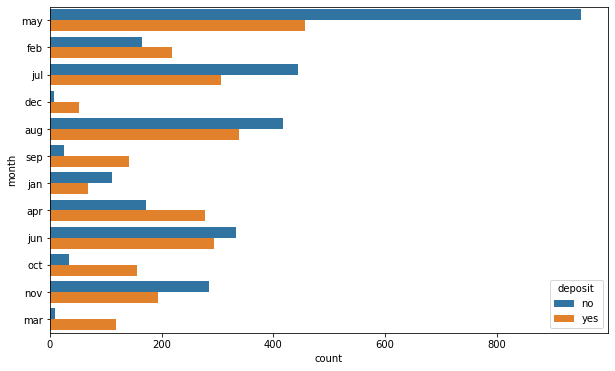

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='month', hue='deposit', data= bank_data)
plt.show()

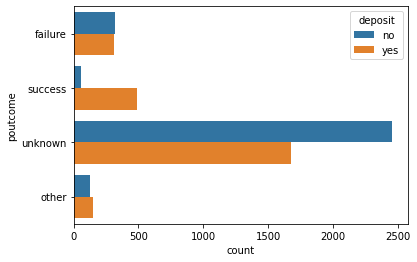

In [ ]:
sns.countplot(y='poutcome', hue='deposit', data= bank_data)
plt.show()

In [ ]:
# checking the proportion of clients who are subscribers and non-subscribers of term deposits based on their outcomes in the previous campaign 
pd.crosstab(index = bank_data['poutcome'], columns = bank_data['deposit'], normalize = True)

deposit,no,yes
poutcome,,
failure,0.057875,0.055366
other,0.022397,0.027235
success,0.009676,0.086902
unknown,0.440244,0.300305


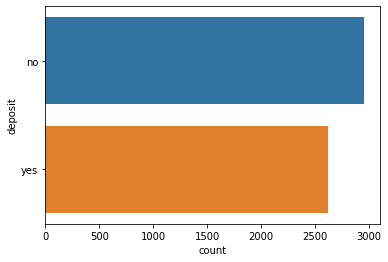

In [ ]:
sns.countplot(y='deposit', data= bank_data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


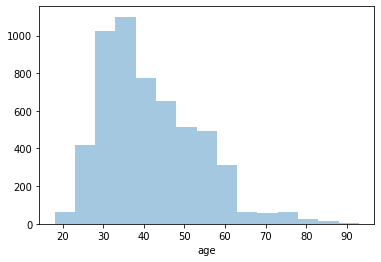

In [ ]:
sns.distplot(bank_data['age'], bins= 15, kde=False)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


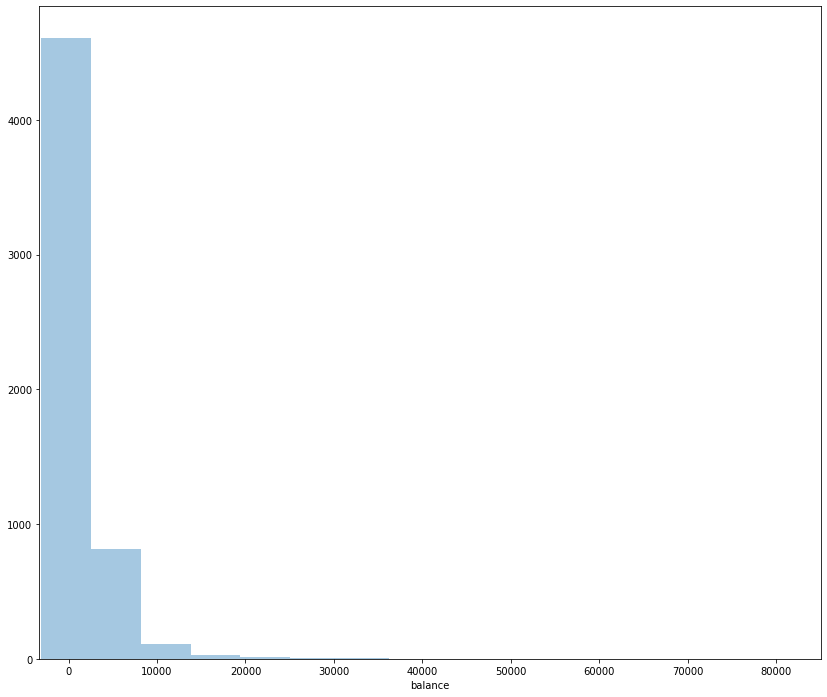

In [ ]:
plt.figure(figsize=(14, 12))
sns.distplot(bank_data['balance'], bins=15, kde=False)
plt.xlim(-3300.0, 85000.0)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


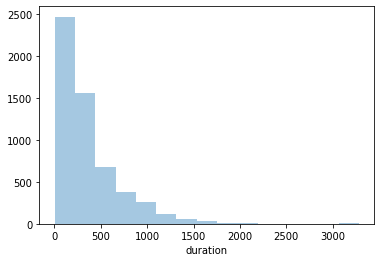

In [ ]:
sns.distplot(bank_data['duration'], bins= 15, kde=False)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


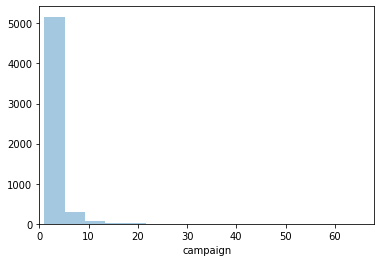

In [ ]:
sns.distplot(bank_data['campaign'], bins= 15, kde=False)
plt.xlim(0, 68)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


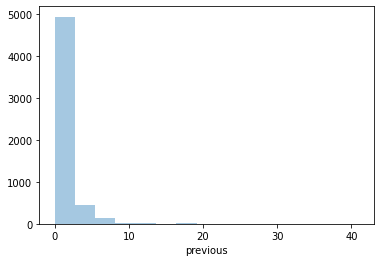

In [ ]:
sns.distplot(bank_data['previous'], bins= 15, kde=False)
plt.show()

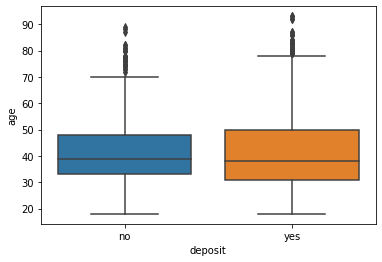

In [ ]:
# Box Plot - Age vs Deposit

sns.boxplot(x='deposit', y='age', data= bank_data)
plt.show()

There are outliers in 'age'column 

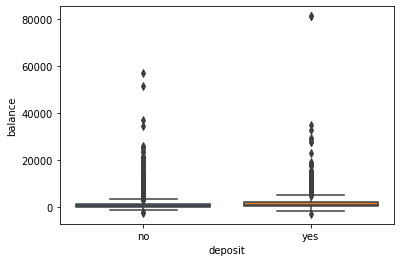

In [ ]:
# Box Plot - balance vs deposit

sns.boxplot(x='deposit', y='balance', data= bank_data)
plt.show()

There are outliers in 'balance' column of dataframe

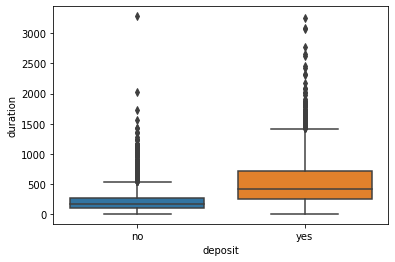

In [ ]:
# Box Plot - duration vs deposit

sns.boxplot(x='deposit', y='duration', data=bank_data)
plt.show()

There are outliers in 'duration' column of dataframe

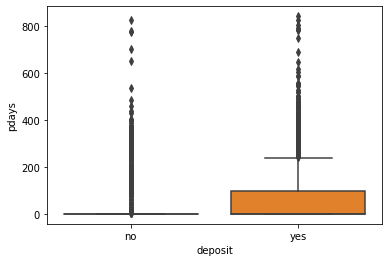

In [ ]:
# Box Plot - duration vs deposit

sns.boxplot(x='deposit', y='pdays', data=bank_data)
plt.show()

There are outliers in 'pdays' column of dataframe

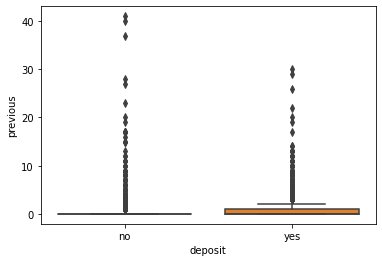

In [ ]:
# Box Plot - previous vs deposit

sns.boxplot(x='deposit', y='previous', data=bank_data)
plt.show()

There are outliers in 'previous' column of dataframe 

Overall, there are outliers in all the numerical variables of given dataset. Hence, outliers are required to be treated as it is the necessary assumption for building logistic regression model. 

In [ ]:
# checking the data types in bank_data dataframe

bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

'day' column is an ordinal categorical variable. But, the data type is 'int64'. Hence, the data type of 'day' column is required to be changed to 'category' type as we anyways cannot perform numerical operations on this column. 

In [ ]:
bank_data['day'] = bank_data['day'].astype('category')

In [ ]:
# checking the correlation between categorical variables in the dataframe
# by extracting the categorical information from the dataframe first 

object_cols = bank_data.select_dtypes(include = ['object'])

In [ ]:
object_cols.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,services,married,unknown,no,yes,no,cellular,may,failure,no
1,technician,married,secondary,no,no,yes,cellular,feb,success,yes
2,services,single,secondary,no,no,yes,cellular,jul,unknown,no
3,management,single,tertiary,no,yes,no,cellular,jul,unknown,no
4,technician,single,secondary,no,yes,no,cellular,may,unknown,no


In [ ]:
# adding 'day' column in object_cols dataframe

object_cols.insert(8, 'day', bank_data['day'], True)

In [ ]:
object_cols.head()

,job,marital,education,default,housing,loan,contact,month,day,poutcome,deposit
0,services,married,unknown,no,yes,no,cellular,may,11,failure,no
1,technician,married,secondary,no,no,yes,cellular,feb,26,success,yes
2,services,single,secondary,no,no,yes,cellular,jul,8,unknown,no
3,management,single,tertiary,no,yes,no,cellular,jul,17,unknown,no
4,technician,single,secondary,no,yes,no,cellular,may,14,unknown,no


In [ ]:
# in order to check the correlation between every pair of categorical variables in the dataset, Chi-squared test will be used here
# importing the required packages

from scipy.stats import chi2_contingency

In [ ]:
object_cols.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day', 'poutcome', 'deposit'],
      dtype='object')

**Chi-Squared Test**

The second value in the output of this test is the p-value. If the p-value is greater than 0.05 then, it suggests that there is no correlation between the two categorical variables. If p-value <= 0.05, it suggests correlation. 

In [ ]:
# checking the correlation between 'job' and other independent categorical variables

cols = 'job'
list_cols = object_cols.columns[1:]

for i in list_cols:
  tab = pd.crosstab(index = object_cols[cols], columns = object_cols[i])
  chi_val = chi2_contingency(observed = tab)
  print("'{}' and '{}' - the p-value is {}".format(cols, i, chi_val[1]))

'job' and 'marital' - the p-value is 5.1794690406871834e-117
'job' and 'education' - the p-value is 0.0
'job' and 'default' - the p-value is 0.06690919696828589
'job' and 'housing' - the p-value is 8.700407102731235e-117
'job' and 'loan' - the p-value is 9.250301465420033e-19
'job' and 'contact' - the p-value is 3.006173372679425e-69
'job' and 'month' - the p-value is 2.3009314916797943e-85
'job' and 'day' - the p-value is 1.020671573946286e-06
'job' and 'poutcome' - the p-value is 9.323112099014966e-19
'job' and 'deposit' - the p-value is 9.83397362379517e-31


Results:

---

Correlation:

'job' and 'education'

---

No Correlation:

1. 'job' and 'marital'
2. 'job' and 'default' 
3. 'job' and 'housing' 
4. 'job' and 'loan'
5. 'job' and 'contact' 
6. 'job' and 'month' 
7. 'job' and 'day' 
8. 'job' and 'poutcome' 

In [ ]:
# now, checking the correlation between 'marital' and other independent categorical variables

cols = 'marital'
list_cols = object_cols.columns[2:]

for i in list_cols:
  tab = pd.crosstab(index = object_cols[cols], columns = object_cols[i])
  chi_val = chi2_contingency(observed = tab)
  print("'{}' and '{}' - the p-value is {}".format(cols, i, chi_val[1]))

'marital' and 'education' - the p-value is 1.3194278867761863e-38
'marital' and 'default' - the p-value is 0.6464939948300724
'marital' and 'housing' - the p-value is 0.01875184979048123
'marital' and 'loan' - the p-value is 4.838255115012534e-06
'marital' and 'contact' - the p-value is 1.8374033130080378e-10
'marital' and 'month' - the p-value is 7.879241900361108e-07
'marital' and 'day' - the p-value is 0.06640326430534356
'marital' and 'poutcome' - the p-value is 0.0023048644323246676
'marital' and 'deposit' - the p-value is 2.0577521354758537e-18


Results:

Correlation:

1. 'marital' and 'housing'
2. 'marital' and 'poutcome'

No Correlation:

1. 'marital' and 'education'
2. 'marital' and 'default'
3. 'marital' and 'loan'
4. 'marital' and 'contact'
5. 'marital' and 'month'
6. 'marital' and 'day'

In [ ]:
# now, checking the correlation between 'education' and other independent categorical variables

cols = 'education'
list_cols = object_cols.columns[3:]

for i in list_cols:
  tab = pd.crosstab(index = object_cols[cols], columns = object_cols[i])
  chi_val = chi2_contingency(observed = tab)
  print("'{}' and '{}' - the p-value is {}".format(cols, i, chi_val[1]))
  


'education' and 'default' - the p-value is 0.5962919475974011
'education' and 'housing' - the p-value is 8.308133023697869e-28
'education' and 'loan' - the p-value is 5.851486886959748e-11
'education' and 'contact' - the p-value is 1.239220882043269e-32
'education' and 'month' - the p-value is 8.039104448766353e-27
'education' and 'day' - the p-value is 1.9692312622003972e-06
'education' and 'poutcome' - the p-value is 0.0001819615484089572
'education' and 'deposit' - the p-value is 1.3675658567608763e-14


Results:

Correlation:

'education' and 'poutcome'

No Correlation:

1. 'education' and 'default' 
2. 'education' and 'housing'
3. 'education' and 'loan' 
4. 'education' and 'contact'
5. 'education' and 'month' 
6. 'education' and 'day' 



We have found till this stage that 'education' is correlated with both the 'poutcome' and 'job' variables.

In [ ]:
# now, checking the correlation between 'default' and other independent categorical variables

cols = 'default'
list_cols = object_cols.columns[4:]

for i in list_cols:
  tab = pd.crosstab(index = object_cols[cols], columns = object_cols[i])
  chi_val = chi2_contingency(observed = tab)
  print("'{}' and '{}' - the p-value is {}".format(cols, i, chi_val[1]))
  

'default' and 'housing' - the p-value is 0.4319747539603439
'default' and 'loan' - the p-value is 8.348470014534872e-10
'default' and 'contact' - the p-value is 0.00014357449220422138
'default' and 'month' - the p-value is 0.033321154815912184
'default' and 'day' - the p-value is 0.6479443109174805
'default' and 'poutcome' - the p-value is 0.0001290839518268901
'default' and 'deposit' - the p-value is 2.9488286716040964e-05


Results:

Correlation:

1. 'default' and 'contact'
2. 'default' and 'month' 
3. 'default' and 'poutcome'

No Correlation:

1. 'default' and 'housing' - the p-value is 0.4319747539603439
2. 'default' and 'loan' - the p-value is 8.348470014534872e-10
3. 'default' and 'day' - the p-value is 0.6479443109174805


In [ ]:
# now, checking the correlation between 'housing' and other independent categorical variables

cols = 'housing'
list_cols = object_cols.columns[5:]

for i in list_cols:
  tab = pd.crosstab(index = object_cols[cols], columns = object_cols[i])
  chi_val = chi2_contingency(observed = tab)
  print("'{}' and '{}' - the p-value is {}".format(cols, i, chi_val[1]))

'housing' and 'loan' - the p-value is 9.947730733659935e-06
'housing' and 'contact' - the p-value is 1.9863965637633185e-87
'housing' and 'month' - the p-value is 1.0351175372998247e-271
'housing' and 'day' - the p-value is 6.742662403881311e-25
'housing' and 'poutcome' - the p-value is 4.613033781770673e-28
'housing' and 'deposit' - the p-value is 2.892171440152387e-46


Results:

No Correlation:

1. 'housing' and 'loan'
2. 'housing' and 'contact' 
3. 'housing' and 'month' 
4. 'housing' and 'day' 
5. 'housing' and 'poutcome' 


In [ ]:
# now, checking the correlation between 'loan' and other independent categorical variables

cols = 'loan'
list_cols = object_cols.columns[6:]

for i in list_cols:
  tab = pd.crosstab(index = object_cols[cols], columns = object_cols[i])
  chi_val = chi2_contingency(observed = tab)
  print("'{}' and '{}' - the p-value is {}".format(cols, i, chi_val[1]))

'loan' and 'contact' - the p-value is 0.028135290136738548
'loan' and 'month' - the p-value is 3.4390613163383307e-35
'loan' and 'day' - the p-value is 0.02745333635700631
'loan' and 'poutcome' - the p-value is 1.7348273675001836e-09
'loan' and 'deposit' - the p-value is 6.204138189238099e-12


Results:

Correlation:

1. 'loan' and 'contact'
2. 'loan' and 'day'

No Correlation:

1. 'loan' and 'month' 
2. 'loan' and 'poutcome' 


In [ ]:
# now, checking the correlation between 'contact' and other independent categorical variables

cols = 'contact'
list_cols = object_cols.columns[7:]

for i in list_cols:
  tab = pd.crosstab(index = object_cols[cols], columns = object_cols[i])
  chi_val = chi2_contingency(observed = tab)
  print("'{}' and '{}' - the p-value is {}".format(cols, i, chi_val[1]))

'contact' and 'month' - the p-value is 0.0
'contact' and 'day' - the p-value is 1.7511153184290982e-39
'contact' and 'poutcome' - the p-value is 6.548121830148851e-100
'contact' and 'deposit' - the p-value is 2.914947342160202e-70


Results:

Correlation:

'contact' and 'month'

No Correlation:

1. 'contact' and 'day' 
2. 'contact' and 'poutcome'
3. 'contact' and 'deposit'


In [ ]:
# now, checking the correlation between 'month' and other independent categorical variables

cols = 'month'
list_cols = object_cols.columns[8:]

for i in list_cols:
  tab = pd.crosstab(index = object_cols[cols], columns = object_cols[i])
  chi_val = chi2_contingency(observed = tab)
  print("'{}' and '{}' - the p-value is {}".format(cols, i, chi_val[1]))

'month' and 'day' - the p-value is 0.0
'month' and 'poutcome' - the p-value is 1.7827126016066163e-106
'month' and 'deposit' - the p-value is 3.3779940532355517e-108


Results:

Correlation:

'month' and 'day'

No Correlation:

1. 'month' and 'poutcome' 
2. 'month' and 'deposit' 

In [ ]:
# now, checking the correlation between 'day' and other independent categorical variables

cols = 'day'
list_cols = object_cols.columns[9:]

for i in list_cols:
  tab = pd.crosstab(index = object_cols[cols], columns = object_cols[i])
  chi_val = chi2_contingency(observed = tab)
  print("'{}' and '{}' - the p-value is {}".format(cols, i, chi_val[1]))

'day' and 'poutcome' - the p-value is 4.982943557925788e-19
'day' and 'deposit' - the p-value is 3.519970004348621e-29


Results:

No correlation: 'day' and 'poutcome'

In [ ]:
# now, checking the correlation between 'poutcome' and 'deposit'

cols = 'poutcome'
list_cols = object_cols.columns[10:]

for i in list_cols:
  tab = pd.crosstab(index = object_cols[cols], columns = object_cols[i])
  chi_val = chi2_contingency(observed = tab)
  print("'{}' and '{}' - the p-value is {}".format(cols, i, chi_val[1]))

'poutcome' and 'deposit' - the p-value is 5.749595549672384e-103


Overall result of Chi-Squared Test:

---

Correlation is found between these pair of categorical independent variables:

1. 'job' and 'education' - the p-value is 0.0
2. 'marital' and 'housing' - the p-value is 0.01875184979048123
3. 'marital' and 'poutcome' - the p-value is 0.0001819615484089572
4. 'education' and 'poutcome' - the p-value is 0.0001819615484089572
5. 'default' and 'contact' - the p-value is 0.00014357449220422138
6. 'default' and 'month' - the p-value is 0.033321154815912184 
7. 'default' and 'poutcome' - the p-value is 0.0001290839518268901
8. 'loan' and 'contact' - the p-value is 0.028135290136738548
9. 'loan' and 'day' - the p-value is 0.02745333635700631
10. 'contact' and 'month' - the p-value is 0.0
11. 'month' and 'day' - the p-value is 0.0





If the p-value is close to 0 in Chi-Squared test then, it suggests a very strong correlation. 

'job', 'poutcome', 'housing', 'default' and 'month' can be removed as they have shown very strong correlations with more than one categorical independent variable in the dataframe and also shown relatively weaker correlation with the target variable, 'deposit', which has to be predicted in this assignment. 

In [ ]:

# importing the necessary packages

# To partition the data into training and validation datasets
from sklearn.model_selection import train_test_split

# To scale the independent variables
from sklearn.preprocessing import StandardScaler

# To encode the target / label variable
from sklearn.preprocessing import LabelEncoder

# Importing the logistic regression model
from sklearn.linear_model import LogisticRegression 

# Importing performance metrics
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
)

In [ ]:
# standardizing the numerical variables
scaler = StandardScaler()

bank_data[['age', 'balance', 'duration', 'pdays', 'previous']] = scaler.fit_transform(
    bank_data[['age', 'balance', 'duration', 'pdays', 'previous']])

In [ ]:
# splitting the dataset into dependent and independent variables
# we will also remove 'job', 'poutcome', 'housing', 'default', 'month' from independent variables
# as we have found correlation between them 

X = bank_data.drop(['job', 'poutcome', 'housing', 'default', 'month', 'deposit'], axis = 1)
y = bank_data['deposit']


In [ ]:
print('The shape of dataframe with independent variables is, {}'.format(X.shape))

print('The shape of dataframe with dependent variables is, {}'.format(y.shape))

The shape of dataframe with independent variables is, (5581, 11)
The shape of dataframe with dependent variables is, (5581,)


In [ ]:
# checking the first few observations of dataframe with independent variables

X.head()

,age,marital,education,balance,loan,contact,day,duration,campaign,pdays,previous
0,-0.014229,married,unknown,-0.436813,no,cellular,11,-0.764824,1,2.559623,0.497661
1,1.243635,married,secondary,0.129587,yes,cellular,26,-0.404463,1,1.259340,1.362908
2,-0.936663,single,secondary,-0.388745,yes,cellular,8,-0.526521,2,-0.483401,-0.367587
3,-0.601233,single,tertiary,-0.036353,no,cellular,17,0.760895,1,-0.483401,-0.367587
4,-1.020521,single,secondary,-0.467735,no,cellular,14,0.417971,3,-0.483401,-0.367587


In [ ]:
# checking the first few observations of dataframe with dependent variable

y.head()

0    1
1    0
2    1
3    1
4    1
Name: deposit, dtype: int64

In [ ]:
# encoding categorical variables

X = pd.get_dummies(X, drop_first = True)

In [ ]:
X.head()

,age,balance,duration,campaign,pdays,previous,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,loan_yes,contact_telephone,contact_unknown,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,-0.014229,-0.436813,-0.764824,1,2.559623,0.497661,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.243635,0.129587,-0.404463,1,1.259340,1.362908,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,-0.936663,-0.388745,-0.526521,2,-0.483401,-0.367587,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.601233,-0.036353,0.760895,1,-0.483401,-0.367587,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-1.020521,-0.467735,0.417971,3,-0.483401,-0.367587,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.replace(['yes', 'no'], [0,1], inplace = True)

1 correspond to 'no' and 0 corresponds to 'yes' in the target variable 'deposit'

In [ ]:
# splitting the datasets with independent and dependent variables respectively into training and validation data

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
# building logistic regression model

logistic_regression = LogisticRegression(random_state = 1)

In [ ]:
logistic_regression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logistic_regression.coef_

array([[-0.22178702, -0.05233871, -1.69402047,  0.12738547, -0.18047252,
        -0.10523402,  0.11097281, -0.47058555, -0.13028803, -0.57056348,
        -0.29885894,  0.50319805,  0.17680667,  1.52776788,  0.0162889 ,
        -0.1838243 , -0.33847417,  0.41968961,  0.44878913,  0.78634378,
         0.29137239, -0.29464776, -0.84937338,  0.48212562,  0.10024697,
         0.29827531,  0.92417079,  0.4923052 ,  0.02993086,  0.68202757,
         0.84259633,  1.31284193,  1.03726667,  0.70415712, -0.16425874,
        -0.05088706,  0.59814991, -0.00248944, -0.15491724, -0.77813957,
         0.82964333,  1.18293047, -0.0661518 ,  0.42342697]])

In [ ]:
logistic_regression.intercept_

array([-0.61866382])

In [ ]:
# making predictions on validation dataset with independent variables

y_preds = logistic_regression.predict(X_val)

In [ ]:
# checking accuracy of predictions by comparing it with observed values of target variable in validation data, y_val

accuracy = accuracy_score(y_val, y_preds)
accuracy

0.7862686567164179

There is approximately 79% accuracy of this prediction

In [ ]:
conf_matrix = confusion_matrix(y_val, y_preds)
conf_matrix

array([[607, 214],
       [144, 710]])

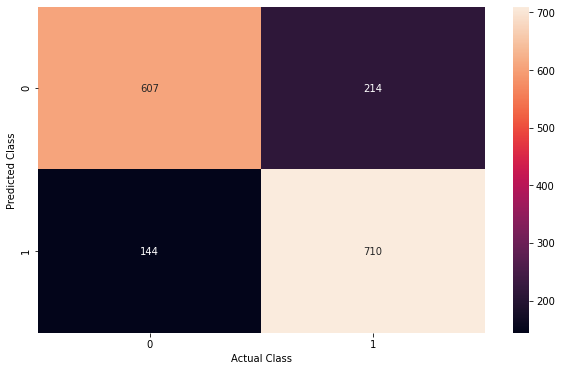

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()

In [ ]:
# checking the total number of incorrectly classified values 

(y_val != y_preds).sum()

358

There are total 358 misclassified values in the target variable, which is approximately 21% of the total values in validation data, y_preds

In [ ]:
# checking the precision of logistic regression model

precision = precision_score(y_val, y_preds)

precision

0.7683982683982684

This logisitic regression model is approximately 77% precise. 

In [ ]:
# checking the true positive rate or correct predictions in positive classes, which is considered as values with target 
# variable = 1. In our logisitc regression model, the value of 1 in target variable corresponds to 'no' values

recall = recall_score(y_val, y_preds)

recall

0.8313817330210773

The prediction of values in which target variable is 'no' or 1 is 83% accurate as per logistic regression model 

In [ ]:
f1_value = f1_score(y_val, y_preds)

f1_value

0.7986501687289089

ROC - AUC Curve

In [ ]:
logistic_regression.predict_proba(X_val)

array([[0.31519815, 0.68480185],
       [0.02234382, 0.97765618],
       [0.06609489, 0.93390511],
       ...,
       [0.69353903, 0.30646097],
       [0.15026114, 0.84973886],
       [0.99591175, 0.00408825]])

In [ ]:
random_prediction = [1 for _ in range(len(y_val))]
logistic_regression_prediction = logistic_regression.predict_proba(X_val)

In [ ]:
random_predictions_fpr, random_predictions_tpr, _ = roc_curve(y_val, random_prediction)
logistic_regression_fpr, logistic_regression_tpr, logistic_regression_thresholds = roc_curve(
    y_val, logistic_regression_prediction[:, 1])

In [ ]:
logistic_regression_thresholds

array([1.99998626e+00, 9.99986262e-01, 9.57211023e-01, 9.57032279e-01,
       9.23415591e-01, 9.23302636e-01, 9.11173116e-01, 9.10360331e-01,
       9.09938534e-01, 9.09403394e-01, 9.04648621e-01, 9.04531030e-01,
       8.89196254e-01, 8.88443431e-01, 8.83474504e-01, 8.83355971e-01,
       8.74535559e-01, 8.74324588e-01, 8.64654717e-01, 8.63597178e-01,
       8.57174315e-01, 8.56469939e-01, 8.51119873e-01, 8.50879512e-01,
       8.49738861e-01, 8.48773233e-01, 8.47800156e-01, 8.46660826e-01,
       8.38236303e-01, 8.36789759e-01, 8.34635555e-01, 8.34621256e-01,
       8.32981658e-01, 8.32300124e-01, 8.27284635e-01, 8.27200462e-01,
       8.21319270e-01, 8.21268428e-01, 8.16558352e-01, 8.16386886e-01,
       8.10823358e-01, 8.10673025e-01, 8.09767220e-01, 8.09251697e-01,
       8.07055126e-01, 8.06091468e-01, 8.05116830e-01, 8.04951693e-01,
       8.03592853e-01, 8.03383001e-01, 7.89063266e-01, 7.87984650e-01,
       7.85627214e-01, 7.85092621e-01, 7.84588567e-01, 7.83956463e-01,
      

In [ ]:
accuracy_list = []

for threshold in logistic_regression_thresholds:
    y_pred_thresh = np.where(logistic_regression_prediction[:, 1] > threshold, 1, 0)
    
    accuracy_list.append(accuracy_score(y_val, y_pred_thresh))

In [ ]:
accuracy_list

[0.49014925373134327,
 0.49014925373134327,
 0.5325373134328358,
 0.533134328358209,
 0.5808955223880597,
 0.5814925373134329,
 0.5964179104477612,
 0.5970149253731343,
 0.5982089552238806,
 0.5988059701492537,
 0.6029850746268657,
 0.6035820895522388,
 0.6250746268656716,
 0.6256716417910447,
 0.6274626865671642,
 0.6280597014925373,
 0.6459701492537313,
 0.6465671641791044,
 0.6567164179104478,
 0.6573134328358209,
 0.6626865671641791,
 0.6632835820895523,
 0.6704477611940298,
 0.6710447761194029,
 0.6716417910447762,
 0.6722388059701493,
 0.6740298507462686,
 0.6746268656716418,
 0.68,
 0.68,
 0.6835820895522388,
 0.684179104477612,
 0.6853731343283582,
 0.6853731343283582,
 0.6907462686567164,
 0.6913432835820895,
 0.6949253731343283,
 0.6955223880597015,
 0.6985074626865672,
 0.6991044776119403,
 0.7056716417910448,
 0.7062686567164179,
 0.7062686567164179,
 0.706865671641791,
 0.7080597014925373,
 0.7086567164179104,
 0.7086567164179104,
 0.7092537313432836,
 0.7104477611940299,


In [ ]:
accuracy_thresh_df = pd.concat([pd.Series(logistic_regression_thresholds), pd.Series(accuracy_list)], axis=1)
accuracy_thresh_df.columns=['Thresholds', 'Accuracy']
accuracy_thresh_df.sort_values(by='Accuracy', ascending=False, inplace=True)

In [ ]:
accuracy_thresh_df.head()

,Thresholds,Accuracy
181,0.586182,0.797612
179,0.586829,0.797612
180,0.586224,0.797015
178,0.586925,0.797015
177,0.587393,0.797015


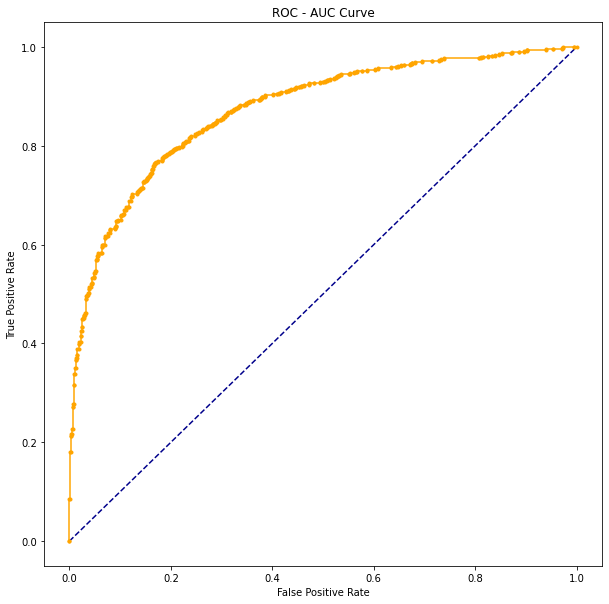

In [ ]:
# plotting the ROC-AUC Curve

plt.figure(figsize=(10, 10))

plt.plot(random_predictions_fpr, random_predictions_tpr, linestyle='--', label="Random Predictions", color='darkblue')
plt.plot(logistic_regression_fpr, logistic_regression_tpr, marker='.', label="Logistic Regression", color='orange')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title("ROC - AUC Curve")

plt.show()

In [ ]:
random_auc = roc_auc_score(y_val, random_prediction)
logistic_regression_auc = roc_auc_score(y_val, logistic_regression_prediction[:, 1])

In [ ]:
random_auc 


0.5

In [ ]:
logistic_regression_auc

0.8725208020150215

Since, the area under the curve is 0.87, the logistic regression model is okay, but not perfect as perfect AUC is close to 1. Since the random guessing classifier AUC value is around 0.5, it shows that there are no serious issues with the model or dataset. However, the AUc of model can be increased from the value of 0.87. We had observed earlier that all the numerical independent variables in our dataframe has outliers and it is one of the assumptions of logistic regression model that it is extremely sensitive to outliers that can be removed or substituted by mean or median values depending upon the nature of distribution of data in each of the independent numeric variables in bank_data dataframe. This approach can improve predictions of logistic regression model. 